In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_excel("D:/github/Etape/toutReponse.xlsx")

In [3]:
df = df.drop("id", axis =1)

In [4]:
df.head()

,dispositif,site,debut,fin,statue,branche,fin1,fin2,fin3,fin4,...,ben1,ben2,ben3,ben4,ben5,ben6,ben7,comment,proposition,register_date
0,Bilan de competences,Avranches,2021-02-03,2021-06-04,beneficiaire,beneficiaire,NaN,NaN,NaN,NaN,...,Très satisfaisant,Très satisfaisant,Très satisfaisant,Très satisfaisant,Peu satisfaisant,Très satisfaisant,NaN,Apprécié les moyens mit à dispositions même si...,Test plus précis a fin de cibler davantage 2 v...,2021-06-22 12:05:16
1,Bilan de competences,Vire,2021-02-23,2021-06-08,prescripteur,prescripteur,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,J'ai été ravie de la prise en charge de mon bi...,NaN,2021-06-22 12:18:15
2,Bilan de competences,Vire,2021-02-23,2021-06-08,beneficiaire,beneficiaire,NaN,NaN,NaN,NaN,...,Très satisfaisant,Très satisfaisant,Très satisfaisant,Très satisfaisant,Très satisfaisant,Très satisfaisant,Très satisfaisant,NaN,NaN,2021-06-22 12:20:08
3,Bilan de competences,Vire,2021-02-23,2021-06-08,intervenant-e,intervenant-e,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-06-22 12:21:35
4,Bilan de competences,Vire,2021-01-08,0021-05-03,prescripteur,prescripteur,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Aucun,NaN,2021-06-22 12:23:50


### Raccourcissement du nom de disposition.

In [5]:
map_dict = {"Remobilisation" : "Remob", "Garantie Departementale d'Activite (GAD)" : "GDA", 
            "Primo insertion sociale":"PIS", "Primo insertion professionnelle":"PIP", 
            "Actions courtes type 'marchons pour ... '":"AC", "Formation civique OFII":"FCO", 
            "Jardins partages": "JP", "#avenir":"#avenir", "Accompagnement a la preparation de la VAE":"APV", 
            "Bilan de competences":"BC","Reseau de soutien et de recherche d'emploi":"RSRE", 
            "Prestations specifiques":"PS", "Accompagnement des porteurs de projets":"APP", 
            "Formation des acteurs":"FA", "Interventions dans les centres de formation":"ICF", 
            "Interventions scolaires et universitaires":"ISU", "La dynimique de l'emploi":"DE", 
            "Présentation du Harcelement":"PH"}
df.dispositif = df.dispositif.map(map_dict)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 40 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   dispositif     157 non-null    object
 1   site           150 non-null    object
 2   debut          157 non-null    object
 3   fin            158 non-null    object
 4   statue         160 non-null    object
 5   branche        160 non-null    object
 6   fin1           6 non-null      object
 7   fin2           6 non-null      object
 8   fin3           6 non-null      object
 9   fin4           7 non-null      object
 10  fin5           7 non-null      object
 11  intType        41 non-null     object
 12  inter1         42 non-null     object
 13  inter2         40 non-null     object
 14  inter3         41 non-null     object
 15  inter4         39 non-null     object
 16  intForDis      41 non-null     object
 17  inter5         14 non-null     object
 18  intRisqS       41 non-null    

In [7]:
df.isnull().sum()
# pd.isnull(df).sum()
# df.dropna(inplace=True)
# sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap="viridis")
#df.isnull().sum().sum()

dispositif         3
site              10
debut              3
fin                2
statue             0
branche            0
fin1             154
fin2             154
fin3             154
fin4             153
fin5             153
intType          119
inter1           118
inter2           120
inter3           119
inter4           121
intForDis        119
inter5           146
intRisqS         119
intRisqH         135
intRisqJ         135
intRisqEn        135
intRisqEc        135
preUsager        142
pre1             142
pre2             142
pre3             142
pre4             142
pre5             142
pre6             142
ben1              64
ben2              64
ben3              64
ben4              63
ben5              64
ben6              65
ben7             128
comment          100
proposition      137
register_date      0
dtype: int64

## Gérer les valeurs manquantes et mauvais

### Dispositif

In [8]:
df[df.dispositif.isnull()==True]

,dispositif,site,debut,fin,statue,branche,fin1,fin2,fin3,fin4,...,ben1,ben2,ben3,ben4,ben5,ben6,ben7,comment,proposition,register_date
7,NaN,Vire,2021-02-11,2021-05-03,beneficiaire,beneficiaire,NaN,NaN,NaN,NaN,...,Très satisfaisant,Très satisfaisant,Très satisfaisant,Très satisfaisant,Satisfaisant,Très satisfaisant,NaN,NaN,+ modernisation des test d'aptitudes +++,2021-06-22 12:30:05
18,NaN,Vire,2021-01-11,2021-04-23,intervenant-e,intervenant-e,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-06-22 12:46:10
30,NaN,NaN,2020-12-02,2021-03-24,intervenant-e,intervenant-e,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-06-22 13:01:54


In [9]:
df.at[7, "dispositif"] = "BC" #df[(df.debut == "2021-02-11") | (df.fin == "2021-05-03")], il ya 4 et tous sont BC.
df.at[18, "dispositif"] ="BC" #df[(df.debut == "2021-01-11") | (df.fin == "2021-04-23")], il ya 4 et tous sont BC.
df.at[30, "dispositif"] ="BC" #df[(df.debut == "2020-12-02") | (df.fin == "2021-03-24")], İL ya 3 et 2 autre sont BC

In [10]:
df.dispositif.isnull().sum()

0

### Site

In [11]:
df[df.site.isnull()==True].head()

,dispositif,site,debut,fin,statue,branche,fin1,fin2,fin3,fin4,...,ben1,ben2,ben3,ben4,ben5,ben6,ben7,comment,proposition,register_date
25,BC,NaN,2021-03-04,2021-06-11,prescripteur,prescripteur,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-06-22 12:56:46
26,BC,NaN,2021-03-04,2021-06-11,beneficiaire,beneficiaire,NaN,NaN,NaN,NaN,...,Très satisfaisant,Très satisfaisant,Très satisfaisant,Très satisfaisant,Très satisfaisant,Très satisfaisant,Très satisfaisant,NaN,NaN,2021-06-22 12:57:32
30,BC,NaN,2020-12-02,2021-03-24,intervenant-e,intervenant-e,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-06-22 13:01:54
51,BC,NaN,2020-09-01,2020-11-28,beneficiaire,beneficiaire,NaN,NaN,NaN,NaN,...,Très satisfaisant,Très satisfaisant,Très satisfaisant,Satisfaisant,Très satisfaisant,Très satisfaisant,Satisfaisant,NaN,"Peut-être un peu plus de temps, plus de rendez...",2021-06-22 14:27:42
107,ISU,NaN,2020-12-01,2020-12-01,prescripteur,prescripteur,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bonne intention intervenants/ élèves. Théme in...,fait un contexte particulier,2021-06-30 10:31:12


In [12]:
df.at[30, "site"] ="Saint-Lo" # df[(df.debut == "2020-12-02") | (df.fin == "2021-03-24")], İL ya 3 et 2 autre sont st.lo
df.at[25, "site"] ="Vire" #df[(df.debut == "2021-03-04") | (df.fin == "2021-06-11")]
df.at[26, "site"] ="Vire" #df[(df.debut == "2021-03-04") | (df.fin == "2021-06-11")]
df.at[51, "site"] ="Vire"  #df[(df.debut == "2020-09-01") | (df.fin == "2020-11-28")] meme dates avec ça
df.at[107, "site"] = "Autre Lieu Delocalise" # meme dates il ya 2 differant dispositif, je designe comme ca. 
df.at[108, "site"] = "Autre Lieu Delocalise" # meme dates il ya 2 differant dispositif, je designe comme ca. 
df.at[111, "site"] = "Autre Lieu Delocalise" #df[(df.debut == "2021-04-06") | (df.fin == "2021-06-25")], il ya 8 data meme
df.at[119, "site"] = "La Ferte-Mace" #df[df.dispositif =="Actions courtes type 'marchons pour ... '"] il ya 2 dispositif action courtes je donne autre lieu
df.at[125, "site"] = "Bayeux"  #df[(df.debut == "2021-05-17") | (df.fin == "2021-07-16")] il ya 8 data meme dates avec bayeux
df.at[158, "site"] = "Avranches" #df[(df.debut == "2021-02-16") | (df.fin == "2021-09-02")]  il ya 12 data meme dates avec avranches

In [13]:
df.site.isnull().sum()

0

### Debut

In [14]:
df.debut.value_counts(ascending=False, sort=True).head() # il ya une mal valeur 212020-01-08. 

2020-06-01    14
2021-02-16    12
2020-06-08    12
2020-11-30     9
2021-04-01     8
Name: debut, dtype: int64

In [15]:
df.debut.replace(to_replace = "212020-01-08", value = "2021-01-08", inplace=True) 
df.debut.replace(to_replace = "2021-10-20", value = "2021-01-20", inplace=True)

In [16]:
df[df.debut.isnull()==True]

,dispositif,site,debut,fin,statue,branche,fin1,fin2,fin3,fin4,...,ben1,ben2,ben3,ben4,ben5,ben6,ben7,comment,proposition,register_date
48,BC,Vire,NaN,NaN,beneficiaire,beneficiaire,NaN,NaN,NaN,NaN,...,Très satisfaisant,Très satisfaisant,Satisfaisant,Satisfaisant,Satisfaisant,Satisfaisant,Satisfaisant,NaN,NaN,2021-06-22 14:12:17
54,BC,Saint-Lo,NaN,NaN,beneficiaire,beneficiaire,NaN,NaN,NaN,NaN,...,Satisfaisant,Très satisfaisant,Très satisfaisant,Très satisfaisant,Très satisfaisant,Très satisfaisant,NaN,NaN,NaN,2021-06-23 09:16:58
104,PIP,Argentan,NaN,2021-06-15,beneficiaire,beneficiaire,NaN,NaN,NaN,NaN,...,Satisfaisant,Satisfaisant,Satisfaisant,Satisfaisant,Satisfaisant,Satisfaisant,NaN,NaN,NaN,2021-06-25 09:05:06


In [17]:
df.at[48, "debut"] = "2020-01-09" 
df.at[104, "debut"] = "2021-01-20"
df.at[54, "debut"] = "2020-09-17"

In [18]:
df.debut.isnull().sum()

0

### Fin

In [19]:
df.fin.value_counts(dropna=False).head()

2020-11-02    13
2020-11-17    12
2021-09-02    12
2021-06-15     9
2021-05-10     8
Name: fin, dtype: int64

In [20]:
df.fin.replace(to_replace = "0021-05-03", value = "2021-05-03", inplace=True)

In [21]:
df.at[48, "fin"] = "2020-06-15"
df.at[54, "fin"] = "2021-02-01"
df.at[93, "fin"] = "2021-05-10" # debut est 2020-11-30, cest pas possible fin au 2020-05-10
df.at[97, "fin"] = "2021-03-01" # debut est 2020-08-01, cest pas possible fin au 2020-03-01

In [22]:
df[93:94]

,dispositif,site,debut,fin,statue,branche,fin1,fin2,fin3,fin4,...,ben1,ben2,ben3,ben4,ben5,ben6,ben7,comment,proposition,register_date
93,PIS,La Ferte-Mace,2020-11-30,2021-05-10,intervenant-e,intervenant-e,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Thème de prestation a été réalisée à la demand...,NaN,2021-06-23 13:10:30


In [23]:
df.fin.isnull().sum()

0

## Création de nouvelles colonnes

### Combien de jours l'action s'est-elle poursuivie ?

In [24]:
df.debut = pd.to_datetime(df.debut, format = "%Y-%m-%d")
df.fin = pd.to_datetime(df.fin, format = "%Y-%m-%d")

In [25]:
df["jour"] = df.fin-df.debut

In [26]:
df.loc[1, "jour"]

Timedelta('105 days 00:00:00')

### En quelle année, mois et jour l'action s'est-elle faite?

In [27]:
df["annéeDebut"] = df["debut"].dt.year
df["moisDebut"] = df["debut"].dt.month
df["jourDebut"] = df["debut"].dt.day
df["annéeFin"] = df["fin"].dt.year
df["moisFin"] = df["fin"].dt.month
df["jourFin"] = df["fin"].dt.day

In [28]:
df[1:2]

,dispositif,site,debut,fin,statue,branche,fin1,fin2,fin3,fin4,...,comment,proposition,register_date,jour,annéeDebut,moisDebut,jourDebut,annéeFin,moisFin,jourFin
1,BC,Vire,2021-02-23,2021-06-08,prescripteur,prescripteur,NaN,NaN,NaN,NaN,...,J'ai été ravie de la prise en charge de mon bi...,NaN,2021-06-22 12:18:15,105 days,2021,2,23,2021,6,8


### Création d'une nouvelle colonne appelée "période".

In [29]:
df["périodeDebut"] = df["moisDebut"] >= 7
df["périodeDebut"] = df["périodeDebut"] + 1
df["périodeFin"] = df["moisFin"] >= 7
df["périodeFin"] = df["périodeFin"] + 1

In [30]:
df[1:2]

,dispositif,site,debut,fin,statue,branche,fin1,fin2,fin3,fin4,...,register_date,jour,annéeDebut,moisDebut,jourDebut,annéeFin,moisFin,jourFin,périodeDebut,périodeFin
1,BC,Vire,2021-02-23,2021-06-08,prescripteur,prescripteur,NaN,NaN,NaN,NaN,...,2021-06-22 12:18:15,105 days,2021,2,23,2021,6,8,1,1


### Création d'une nouvelle colonne appelée période annuelle.

In [31]:
df["périodeAnnuelleDebut"] = df["annéeDebut"].astype(str) + "-" + df["périodeDebut"].astype(str)

In [32]:
df["périodeAnnuelleFin"] = df["annéeFin"].astype(str) + "-" + df["périodeFin"].astype(str)

In [33]:
df[1:2]

,dispositif,site,debut,fin,statue,branche,fin1,fin2,fin3,fin4,...,annéeDebut,moisDebut,jourDebut,annéeFin,moisFin,jourFin,périodeDebut,périodeFin,périodeAnnuelleDebut,périodeAnnuelleFin
1,BC,Vire,2021-02-23,2021-06-08,prescripteur,prescripteur,NaN,NaN,NaN,NaN,...,2021,2,23,2021,6,8,1,1,2021-1,2021-1


## Nouvelle table 

In [34]:
df.columns

Index(['dispositif', 'site', 'debut', 'fin', 'statue', 'branche', 'fin1',
       'fin2', 'fin3', 'fin4', 'fin5', 'intType', 'inter1', 'inter2', 'inter3',
       'inter4', 'intForDis', 'inter5', 'intRisqS', 'intRisqH', 'intRisqJ',
       'intRisqEn', 'intRisqEc', 'preUsager', 'pre1', 'pre2', 'pre3', 'pre4',
       'pre5', 'pre6', 'ben1', 'ben2', 'ben3', 'ben4', 'ben5', 'ben6', 'ben7',
       'comment', 'proposition', 'register_date', 'jour', 'annéeDebut',
       'moisDebut', 'jourDebut', 'annéeFin', 'moisFin', 'jourFin',
       'périodeDebut', 'périodeFin', 'périodeAnnuelleDebut',
       'périodeAnnuelleFin'],
      dtype='object')

In [35]:
df = df[['dispositif', 'site', 
    'debut', 'annéeDebut','moisDebut', 'jourDebut','périodeDebut', 'périodeAnnuelleDebut',
    'fin', 'annéeFin', 'moisFin', 'jourFin','périodeFin', 'périodeAnnuelleFin', 
    'jour', 'statue', 'branche', 'fin1', 'fin2', 'fin3', 'fin4', 'fin5', 
    'intType', 'inter1', 'inter2', 'inter3', 'inter4', 'intForDis', 'inter5', 
    'intRisqS', 'intRisqH', 'intRisqJ','intRisqEn', 'intRisqEc', 'preUsager', 
    'pre1', 'pre2', 'pre3', 'pre4','pre5', 'pre6', 
    'ben1', 'ben2', 'ben3', 'ben4', 'ben5', 'ben6', 'ben7',
       'comment', 'proposition', 'register_date']]

In [36]:
df[1:2]

,dispositif,site,debut,annéeDebut,moisDebut,jourDebut,périodeDebut,périodeAnnuelleDebut,fin,annéeFin,...,ben1,ben2,ben3,ben4,ben5,ben6,ben7,comment,proposition,register_date
1,BC,Vire,2021-02-23,2021,2,23,1,2021-1,2021-06-08,2021,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,J'ai été ravie de la prise en charge de mon bi...,NaN,2021-06-22 12:18:15


## Analyse de questionnaire

### Combien d'enquêtes avons-nous ?

In [37]:
print("Il y a", len(df.index), "enquêtes dans la base de données.")
print("Ces enquêtes sont réalisées entre", str(df.debut.min())[0:10], "et", str(df.debut.max())[0:10])

Il y a 160 enquêtes dans la base de données.
Ces enquêtes sont réalisées entre 2019-11-15 et 2021-09-01


### Nom et Nombre total de dispositif sont:

In [38]:
print("Nom de dispositif sont:", df.dispositif.unique())
print("Nombre de dispositif sont: ", df.dispositif.nunique())

Nom de dispositif sont: ['BC' 'PIS' 'Remob' 'PIP' 'GDA' 'ISU' 'PH' 'DE' 'PS' 'AC' 'FA']
Nombre de dispositif sont:  11


### Dispersion du type de dispositif parmi tout questionnaires

BC       60
PIP      28
PIS      23
PS       15
Remob    13
DE        9
FA        5
ISU       2
AC        2
GDA       2
PH        1
Name: dispositif, dtype: int64


Text(0.5, 1.0, 'dispersion du type de dispositif')

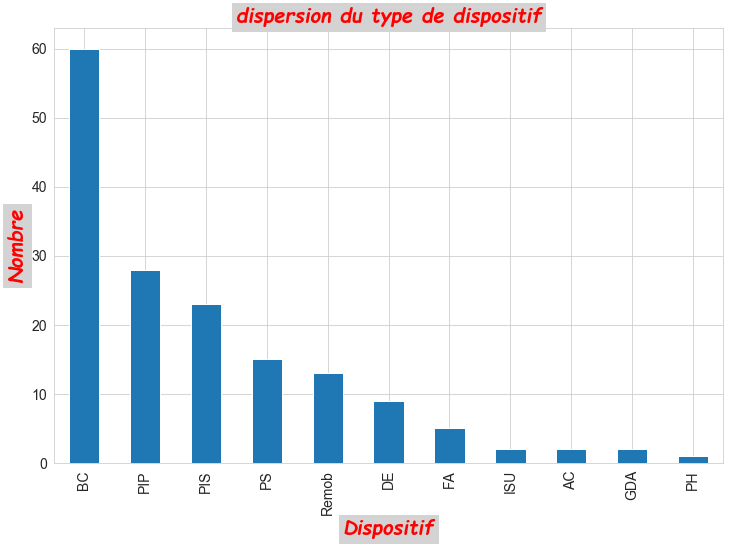

In [39]:
print(df.dispositif.value_counts(dropna=True))
fontdict = {"size":20, "color":"red", "alpha":1, "backgroundcolor":"lightgray", "style": "italic", "weight":"black", "family": "fantasy"}
dispTotal = df.dispositif.value_counts().plot(kind="bar", figsize=(12,8), fontsize =14)
dispTotal.set_xlabel("Dispositif", fontdict = fontdict)
dispTotal.set_ylabel("Nombre", fontdict= fontdict)
dispTotal.set_title(label = "dispersion du type de dispositif", fontdict= fontdict)

### Taux de pourcentage de du type de dispositif sont:

BC       0.38
PIP      0.18
PIS      0.14
PS       0.09
Remob    0.08
DE       0.06
FA       0.03
ISU      0.01
AC       0.01
GDA      0.01
PH       0.01
Name: dispositif, dtype: float64


Text(0.5, 1.0, 'Taux de pourcentage de dispositif')

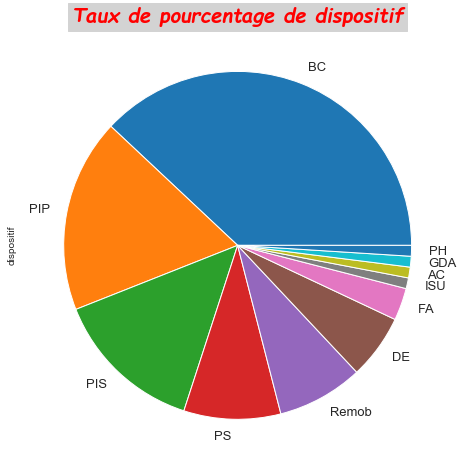

In [40]:
print(round((df.dispositif.value_counts(normalize=True)), 2))
dispTaux = round(df.dispositif.value_counts(normalize=True), 2).plot(kind="pie", figsize = (12,8), fontsize=13)
dispTaux.set_title("Taux de pourcentage de dispositif", fontdict=fontdict)

## Analyse de site

### Nom et Nombre total de site sont:

In [41]:
print("Nom de sites sont:", df.site.unique())
print("Nombre de site est: ", df.site.nunique())

Nom de sites sont: ['Avranches' 'Vire' 'Argentan' 'Saint-Lo' 'La Ferte-Mace' 'Flers'
 'Domfront' 'Autre Lieu Delocalise' 'Bayeux' 'Falaise']
Nombre de site est:  10


### Dispersion de site:

Vire                     49
Argentan                 25
Avranches                14
Domfront                 13
Saint-Lo                 12
Autre Lieu Delocalise    12
La Ferte-Mace            12
Bayeux                    9
Flers                     8
Falaise                   6
Name: site, dtype: int64


Text(0.5, 1.0, 'Nombres total de site')

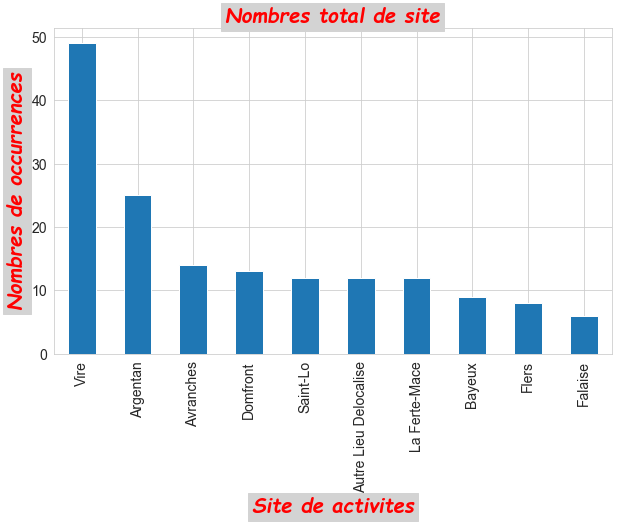

In [42]:
print(df.site.value_counts())
siteTotal = df.site.value_counts().plot(kind = "bar", title = "Nombre total de site", figsize=(10,6), fontsize=14)
siteTotal.set_xlabel("Site de activites", fontdict=fontdict)
siteTotal.set_ylabel("Nombres de occurrences", fontdict=fontdict)
siteTotal.set_title("Nombres total de site", fontdict=fontdict)

### Taux de pourcentage de site sont:

Vire                     0.31
Argentan                 0.16
Avranches                0.09
Domfront                 0.08
Saint-Lo                 0.08
Autre Lieu Delocalise    0.08
La Ferte-Mace            0.08
Bayeux                   0.06
Flers                    0.05
Falaise                  0.04
Name: site, dtype: float64


Text(0.5, 1.0, 'Taux de pourcentage de site')

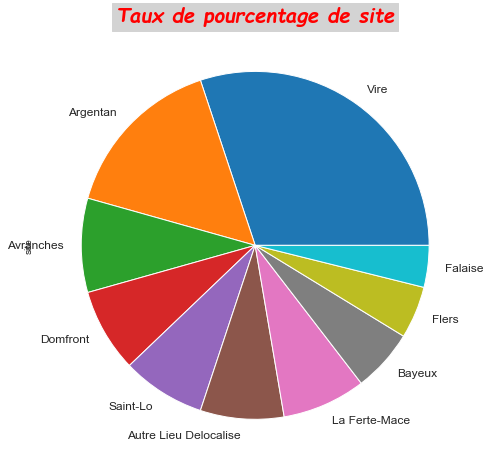

In [43]:
print(round((df.site.value_counts(normalize=True)), 2))
siteTaux = round(df.site.value_counts(normalize=True), 2).plot(kind="pie", figsize = (12,8), fontsize=12)
siteTaux.set_title("Taux de pourcentage de site", fontdict=fontdict)

## Analyse de debut

In [44]:
df[1:2]

,dispositif,site,debut,annéeDebut,moisDebut,jourDebut,périodeDebut,périodeAnnuelleDebut,fin,annéeFin,...,ben1,ben2,ben3,ben4,ben5,ben6,ben7,comment,proposition,register_date
1,BC,Vire,2021-02-23,2021,2,23,1,2021-1,2021-06-08,2021,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,J'ai été ravie de la prise en charge de mon bi...,NaN,2021-06-22 12:18:15


### Nombre de demandes d'enquête par année par rapport de debut de disposition

Nombre de demandes d'enquête par année : 
 2021    81
2020    78
2019     1
Name: annéeDebut, dtype: int64


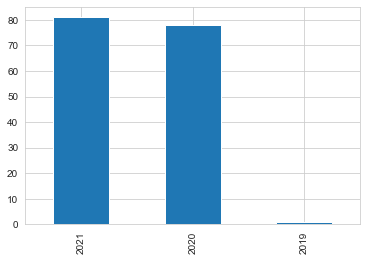

In [45]:
print("Nombre de demandes d'enquête par année :","\n", df.annéeDebut.value_counts())
df.annéeDebut.value_counts().plot(kind="bar")

### Nombre de demandes d'enquête par mois par rapport de debut de disposition

Text(0.5, 1.0, 'Les debuts de disposition par rapport de mois')

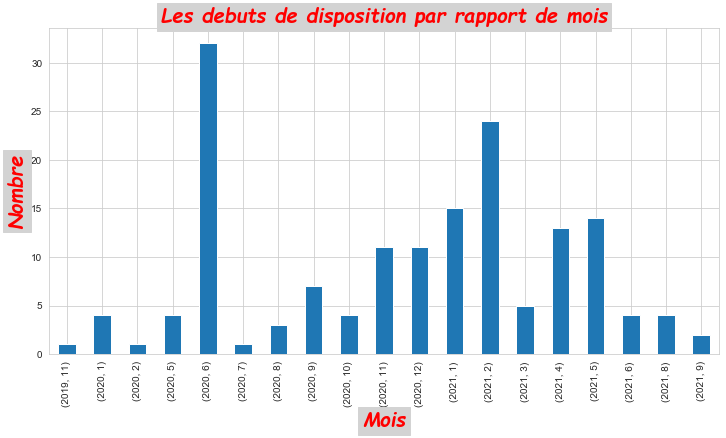

In [46]:
debutMois = df.groupby("annéeDebut")["moisDebut"].value_counts(ascending=False, sort=False).plot(kind="bar", figsize=(12,6))
debutMois.set_xlabel("Mois", fontdict=fontdict)
debutMois.set_ylabel("Nombre", fontdict=fontdict)
debutMois.set_title("Les debuts de disposition par rapport de mois", fontdict=fontdict)

### Periode des debuts

Répartition des périodes selon les dates de début est : périodeAnnuelleDebut
2019-2     1
2020-1    41
2020-2    37
2021-1    75
2021-2     6
Name: dispositif, dtype: int64


Text(0.5, 1.0, 'Répartition des périodes selon les dates de début')

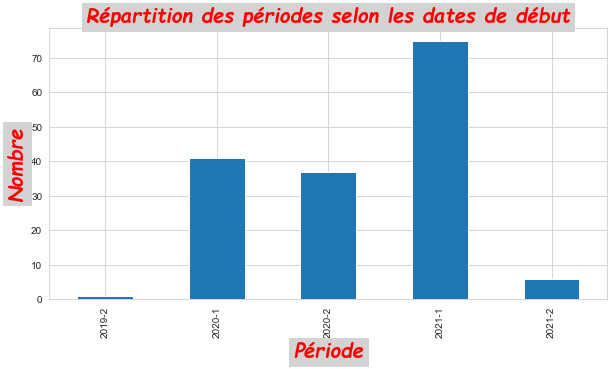

In [47]:
print("Répartition des périodes selon les dates de début est :", df.groupby("périodeAnnuelleDebut")["dispositif"].count())
périodeDebut = df.groupby("périodeAnnuelleDebut")["dispositif"].count().plot(kind="bar", figsize=(10,5))
périodeDebut.set_xlabel("Période", fontdict=fontdict)
périodeDebut.set_ylabel("Nombre", fontdict=fontdict)
périodeDebut.set_title("Répartition des périodes selon les dates de début", fontdict=fontdict)

## Analyse de fin

### Nombre de demandes d'enquête par année par rapport de fin de disposition

Nombre de demandes d'enquête par année : 
 2021    110
2020     50
Name: annéeFin, dtype: int64


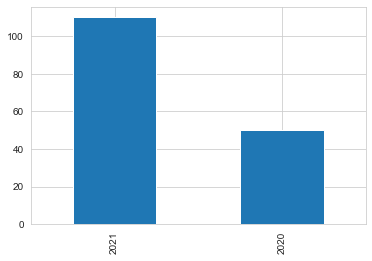

In [48]:
print("Nombre de demandes d'enquête par année :","\n", df.annéeFin.value_counts())
df.annéeFin.value_counts().plot(kind="bar")

### Nombre de demandes d'enquête par mois par rapport de fin de disposition

Text(0.5, 1.0, 'Les fins de disposition par rapport de mois')

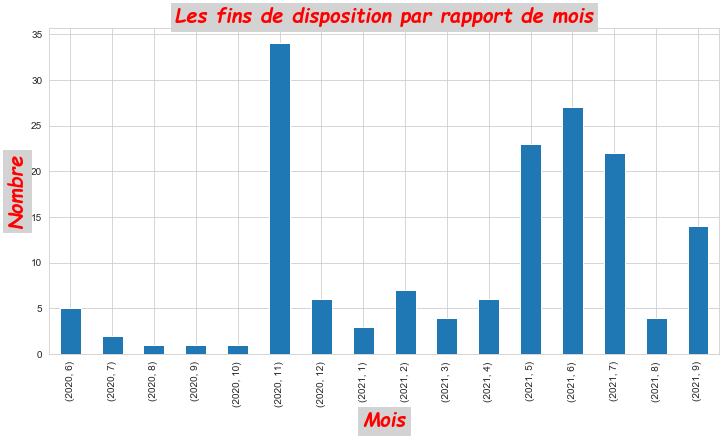

In [49]:
finMois = df.groupby("annéeFin")["moisFin"].value_counts(ascending=False, sort=False).plot(kind="bar", figsize=(12,6))
finMois.set_xlabel("Mois", fontdict=fontdict)
finMois.set_ylabel("Nombre", fontdict=fontdict)
finMois.set_title("Les fins de disposition par rapport de mois", fontdict=fontdict)

### Periode des fins

Répartition des périodes selon les dates de fin est : périodeAnnuelleFin
2020-1     5
2020-2    45
2021-1    70
2021-2    40
Name: dispositif, dtype: int64


Text(0.5, 1.0, 'Répartition des périodes selon les dates de début')

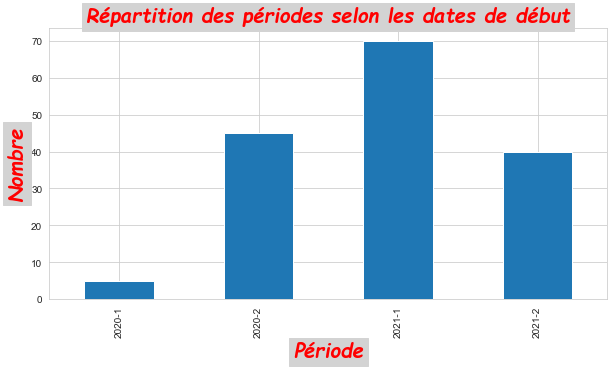

In [50]:
print("Répartition des périodes selon les dates de fin est :", df.groupby("périodeAnnuelleFin")["dispositif"].count())
périodeFin = df.groupby("périodeAnnuelleFin")["dispositif"].count().plot(kind="bar", figsize=(10,5))
périodeFin.set_xlabel("Période", fontdict=fontdict)
périodeFin.set_ylabel("Nombre", fontdict=fontdict)
périodeFin.set_title("Répartition des périodes selon les dates de début", fontdict=fontdict)

## Analyse de jour

In [65]:
df.dtypes

dispositif                       object
site                             object
debut                    datetime64[ns]
annéeDebut                        int64
moisDebut                         int64
jourDebut                         int64
périodeDebut                      int32
périodeAnnuelleDebut             object
fin                      datetime64[ns]
annéeFin                          int64
moisFin                           int64
jourFin                           int64
périodeFin                        int32
périodeAnnuelleFin               object
jour                    timedelta64[ns]
statue                           object
branche                          object
fin1                             object
fin2                             object
fin3                             object
fin4                             object
fin5                             object
intType                          object
inter1                           object
inter2                           object


In [66]:
df.jour.astype("str")

0      121 days 00:00:00.000000000
1      105 days 00:00:00.000000000
2      105 days 00:00:00.000000000
3      105 days 00:00:00.000000000
4      115 days 00:00:00.000000000
                  ...             
155    198 days 00:00:00.000000000
156    198 days 00:00:00.000000000
157    198 days 00:00:00.000000000
158    198 days 00:00:00.000000000
159    198 days 00:00:00.000000000
Name: jour, Length: 160, dtype: object

In [223]:
df.jour.value_counts(ascending=False, sort=True).head()

154 days    13
162 days    12
198 days    12
161 days    10
0 days       9
Name: jour, dtype: int64

In [228]:
df.dtypes

dispositif                       object
site                             object
debut                    datetime64[ns]
annéeDebut                        int64
moisDebut                         int64
jourDebut                         int64
périodeDebut                      int32
périodeAnnuelleDebut             object
fin                      datetime64[ns]
annéeFin                          int64
moisFin                           int64
jourFin                           int64
périodeFin                        int32
périodeAnnuelleFin               object
jour                    timedelta64[ns]
statue                           object
branche                          object
fin1                             object
fin2                             object
fin3                             object
fin4                             object
fin5                             object
intType                          object
inter1                           object
inter2                           object


In [239]:
df.jour.str.slice(0,3)

AttributeError: Can only use .str accessor with string values!

In [233]:
df.groupby("dispositif")["site"].count()

dispositif
AC        2
BC       60
DE        9
FA        5
GDA       2
ISU       2
PH        1
PIP      28
PIS      23
PS       15
Remob    13
Name: site, dtype: int64

In [ ]:
df.plot()

In [181]:
dfFin = df[df.statue =="financeur"]

In [182]:
dfFin

,dispositif,site,debut,fin,jour,period,statue,branche,fin1,fin2,...,ben1,ben2,ben3,ben4,ben5,ben6,ben7,comment,proposition,register_date
99,PIP,Argentan,2021-01-20,2021-06-15,146 days,Jan-Jul,financeur,financeur,Très satisfaisant,Très satisfaisant,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,La prestation correspond aux attentes du marché.,NaN,2021-06-25 08:58:23
108,PH,NaN,2020-12-01,2020-12-01,0 days,Jan-Jul,financeur,financeur,Très satisfaisant,Très satisfaisant,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,renouvellement de cette action aupres des 6ème...,NaN,2021-06-30 10:32:36
127,PS,Bayeux,2021-05-17,2021-07-16,60 days,Jan-Jul,financeur,financeur,Très satisfaisant,Très satisfaisant,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Accès à l'emploi pour 5p./10 soit 50% : 2 ACI...,Travailler sur la mixité des emplois. Elargir ...,2021-07-16 14:39:02
145,FA,Vire,2021-08-30,2021-08-30,0 days,Jan-Jul,financeur,financeur,Très satisfaisant,Très satisfaisant,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-08-30 14:03:26


In [40]:
dfFin.drop(columns=['intType', 'inter1', 'inter2', 'inter3','inter4', 'intForDis', 'inter5', 'intRisqS', 'intRisqH', 'intRisqJ',
       'intRisqEn', 'intRisqEc', 'preUsager', 'pre1', 'pre2', 'pre3', 'pre4','pre5', 'pre6', 
                    'ben1', 'ben2', 'ben3', 'ben4', 'ben5', 'ben6', 'ben7'], axis = 1, inplace = True)

In [41]:
dfFin

,dispositif,site,debut,fin,statue,branche,fin1,fin2,fin3,fin4,fin5,comment,proposition,register_date
99,PIP,Argentan,2021-01-20,2021-06-15,financeur,financeur,Très satisfaisant,Très satisfaisant,Satisfaisant,Satisfaisant,Très satisfaisant,La prestation correspond aux attentes du marché.,NaN,2021-06-25 08:58:23
108,PH,NaN,2020-12-01,2020-12-01,financeur,financeur,Très satisfaisant,Très satisfaisant,Très satisfaisant,Très satisfaisant,Très satisfaisant,renouvellement de cette action aupres des 6ème...,NaN,2021-06-30 10:32:36
127,PS,Bayeux,2021-05-17,2021-07-16,financeur,financeur,Très satisfaisant,Très satisfaisant,Très satisfaisant,Satisfaisant,Très satisfaisant,Accès à l'emploi pour 5p./10 soit 50% : 2 ACI...,Travailler sur la mixité des emplois. Elargir ...,2021-07-16 14:39:02


In [42]:
dfFin.rename(columns={"fin1":"Disponibilité", "fin2": "Administratif", "fin3": "Respect", "fin4":"Cohérence", "fin5": "Supports"}, inplace=True)

In [43]:
dfFin

,dispositif,site,debut,fin,statue,branche,Disponibilité,Administratif,Respect,Cohérence,Supports,comment,proposition,register_date
99,PIP,Argentan,2021-01-20,2021-06-15,financeur,financeur,Très satisfaisant,Très satisfaisant,Satisfaisant,Satisfaisant,Très satisfaisant,La prestation correspond aux attentes du marché.,NaN,2021-06-25 08:58:23
108,PH,NaN,2020-12-01,2020-12-01,financeur,financeur,Très satisfaisant,Très satisfaisant,Très satisfaisant,Très satisfaisant,Très satisfaisant,renouvellement de cette action aupres des 6ème...,NaN,2021-06-30 10:32:36
127,PS,Bayeux,2021-05-17,2021-07-16,financeur,financeur,Très satisfaisant,Très satisfaisant,Très satisfaisant,Satisfaisant,Très satisfaisant,Accès à l'emploi pour 5p./10 soit 50% : 2 ACI...,Travailler sur la mixité des emplois. Elargir ...,2021-07-16 14:39:02


In [20]:
#map_dict_fin = {"Très satisfaisant":5, "Satisfaisant":4, "Moyennement satisfaisant":3, "Pas satisfaisant":2, "Non concerné":1}

In [21]:
#dfFin.Disponibilité = dfFin.Disponibilité.map(map_dict_fin)
#dfFin.Administratif = dfFin.Administratif.map(map_dict_fin)
#dfFin.Respect = dfFin.Respect.map(map_dict_fin)
#dfFin.Cohérence = dfFin.Cohérence.map(map_dict_fin)
#dfFin.Supports = dfFin.Supports.map(map_dict_fin)

In [59]:
dfFin = dfFin[['dispositif', 'site', 'debut', 'fin', 'jour', 'statue', 'branche', 'Disponibilité',
       'Administratif', 'Respect', 'Cohérence', 'Supports', 'comment', 'proposition', 'register_date']]

In [60]:
dfFin

,dispositif,site,debut,fin,jour,statue,branche,Disponibilité,Administratif,Respect,Cohérence,Supports,comment,proposition,register_date
99,PIP,Argentan,2021-01-20,2021-06-15,146 days,financeur,financeur,Très satisfaisant,Très satisfaisant,Satisfaisant,Satisfaisant,Très satisfaisant,La prestation correspond aux attentes du marché.,NaN,2021-06-25 08:58:23
108,PH,NaN,2020-12-01,2020-12-01,0 days,financeur,financeur,Très satisfaisant,Très satisfaisant,Très satisfaisant,Très satisfaisant,Très satisfaisant,renouvellement de cette action aupres des 6ème...,NaN,2021-06-30 10:32:36
127,PS,Bayeux,2021-05-17,2021-07-16,60 days,financeur,financeur,Très satisfaisant,Très satisfaisant,Très satisfaisant,Satisfaisant,Très satisfaisant,Accès à l'emploi pour 5p./10 soit 50% : 2 ACI...,Travailler sur la mixité des emplois. Elargir ...,2021-07-16 14:39:02


### Les Avarages Pour Financeur

#### Question 1: Disponibilité et écoute de votre interlocuteur

Le nombre total de réponses sur Disponibilité est : Très satisfaisant    3
Name: Disponibilité, dtype: int64
Pourcentage pour Disponibilité est:  Très satisfaisant    100.0
Name: Disponibilité, dtype: float64


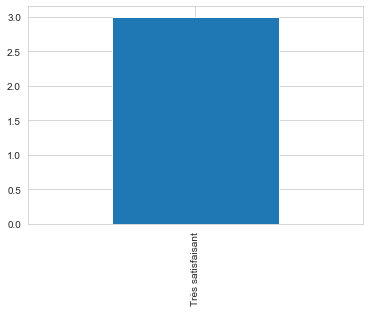

In [61]:
print("Le nombre total de réponses sur Disponibilité est :", dfFin["Disponibilité"].value_counts())
print("Pourcentage pour Disponibilité est: ", round(dfFin["Disponibilité"].value_counts(normalize=True)*100,1))
dfFin.Disponibilité.value_counts().plot(kind="bar")

#### Question 2: Suivi administratif de la prestation (convention, attestations, facturation…)

Le nombre total de réponses sur Administratif est : Très satisfaisant    3
Name: Administratif, dtype: int64
Avarage pour Administratif est:  Très satisfaisant    100.0
Name: Administratif, dtype: float64


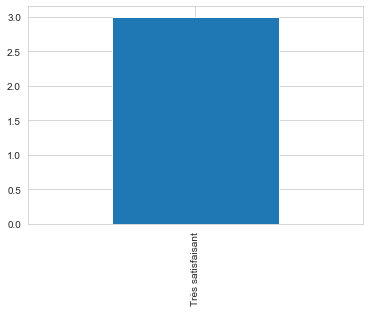

In [50]:
print("Le nombre total de réponses sur Administratif est :", dfFin["Administratif"].value_counts())
print("Avarage pour Administratif est: ", round(dfFin["Administratif"].value_counts(normalize=True)*100,1))
dfFin.Administratif.value_counts().plot(kind="bar")

#### Question 3: Respect des engagements pris

Le nombre total de réponses sur Respect est : Très satisfaisant    2
Satisfaisant         1
Name: Respect, dtype: int64
Avarage pour Respect est:  Très satisfaisant    66.7
Satisfaisant         33.3
Name: Respect, dtype: float64


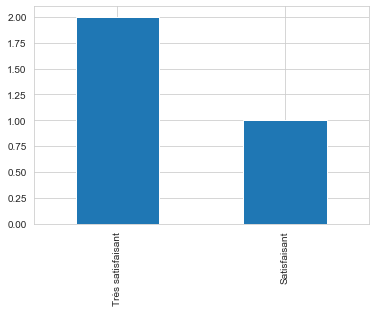

In [51]:
print("Le nombre total de réponses sur Respect est :", dfFin["Respect"].value_counts())
print("Avarage pour Respect est: ", round(dfFin["Respect"].value_counts(normalize=True)*100,1))
dfFin.Respect.value_counts().plot(kind="bar")

#### Question 4: Cohérence des objectifs et des contenus au regard de vos besoins

Le nombre total de réponses sur Cohérence est : Satisfaisant         2
Très satisfaisant    1
Name: Cohérence, dtype: int64
Avarage pour Cohérence est:  Satisfaisant         66.7
Très satisfaisant    33.3
Name: Cohérence, dtype: float64


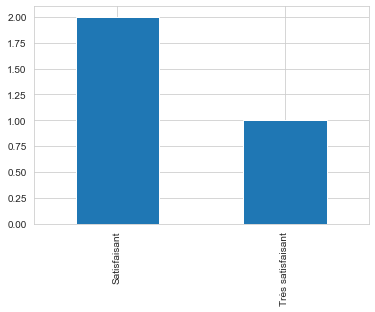

In [52]:
print("Le nombre total de réponses sur Cohérence est :", dfFin["Cohérence"].value_counts())
print("Avarage pour Cohérence est: ", round(dfFin["Cohérence"].value_counts(normalize=True)*100,1))
dfFin.Cohérence.value_counts().plot(kind="bar")

#### Question 5: Supports et moyens pédagogiques mis en œuvre au regard de vos attentes

Le nombre total de réponses sur Supports est : Très satisfaisant    3
Name: Supports, dtype: int64
Avarage pour Supports est:  Très satisfaisant    100.0
Name: Supports, dtype: float64


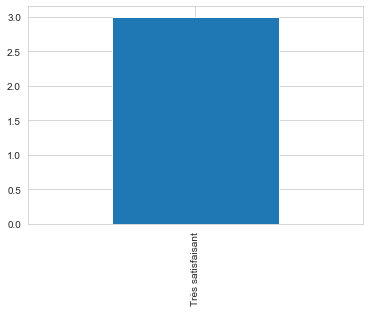

In [53]:
print("Le nombre total de réponses sur Supports est :", dfFin["Supports"].value_counts())
print("Avarage pour Supports est: ", round(dfFin["Supports"].value_counts(normalize=True)*100,1))
dfFin.Supports.value_counts().plot(kind="bar")

In [ ]:
print(round(dfFin["Disponibilité"].value_counts(normalize=True),1))
print(round(dfFin["Administratif"].value_counts(normalize=True),1))
print(round(dfFin["Respect"].value_counts(normalize=True),1))
print(round(dfFin["Cohérence"].value_counts(normalize=True),1))
print(round(dfFin["Supports"].value_counts(normalize=True),1))

In [25]:

print("Avarage pour Administratif est: ", round(dfFin.Administratif.mean(), 1))
print("Avarage pour Respect est: ", round(dfFin.Respect.mean(),1))
print("Avarage pour Cohérence est: ", round(dfFin.Cohérence.mean(), 1))
print("Avarage pour Supports est: ", round(dfFin.Supports.mean(), 1))

Avarage pour Disponibilité est:  5.0
Avarage pour Administratif est:  5.0
Avarage pour Respect est:  4.7
Avarage pour Cohérence est:  4.3
Avarage pour Supports est:  5.0


In [ ]:
print(dfFin["Administratif"].value_counts())
print(dfFin["Respect"].value_counts())
print(dfFin["Cohérence"].value_counts())
print(dfFin["Supports"].value_counts())

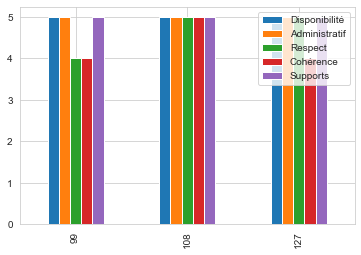

In [26]:
dfFin.plot.bar()

In [27]:
dfFin.Disponibilité.value_counts()

5    3
Name: Disponibilité, dtype: int64

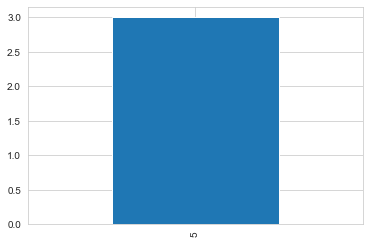

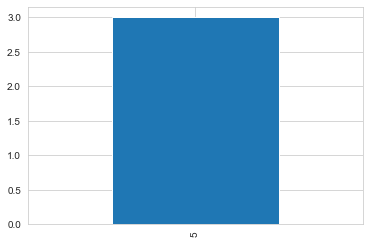

In [29]:
dfFin.Administratif.value_counts().plot(kind="bar")

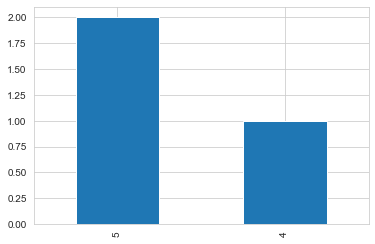

In [30]:
dfFin.Respect.value_counts().plot(kind="bar")

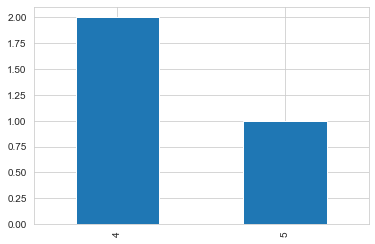

In [31]:
dfFin.Cohérence.value_counts().plot(kind="bar")

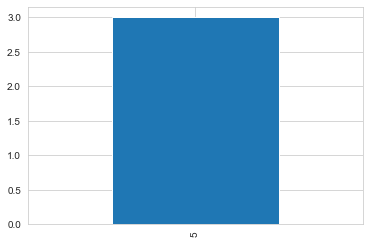

In [32]:
dfFin.Supports.value_counts().plot(kind="bar")

In [29]:
dfFin.head()

,dispositif,site,debut,fin,statue,branche,fin1,fin2,fin3,fin4,...,ben1,ben2,ben3,ben4,ben5,ben6,ben7,comment,proposition,register_date
0,BC,Avranches,2021-02-03,2021-06-04,beneficiaire,beneficiaire,NaN,NaN,NaN,NaN,...,Très satisfaisant,Très satisfaisant,Très satisfaisant,Très satisfaisant,Peu satisfaisant,Très satisfaisant,NaN,Apprécié les moyens mit à dispositions même si...,Test plus précis a fin de cibler davantage 2 v...,2021-06-22 12:05:16
1,BC,Vire,2021-02-23,2021-06-08,prescripteur,prescripteur,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,J'ai été ravie de la prise en charge de mon bi...,NaN,2021-06-22 12:18:15
2,BC,Vire,2021-02-23,2021-06-08,beneficiaire,beneficiaire,NaN,NaN,NaN,NaN,...,Très satisfaisant,Très satisfaisant,Très satisfaisant,Très satisfaisant,Très satisfaisant,Très satisfaisant,Très satisfaisant,NaN,NaN,2021-06-22 12:20:08
3,BC,Vire,2021-02-23,2021-06-08,intervenant-e,intervenant-e,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-06-22 12:21:35
4,BC,Vire,2021-01-08,0021-05-03,prescripteur,prescripteur,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Aucun,NaN,2021-06-22 12:23:50
5,BC,Vire,2021-01-08,2021-05-03,beneficiaire,beneficiaire,NaN,NaN,NaN,NaN,...,Très satisfaisant,Très satisfaisant,Très satisfaisant,Très satisfaisant,Très satisfaisant,Très satisfaisant,NaN,Aucun,NaN,2021-06-22 12:24:59
6,BC,Vire,212020-01-08,2021-02-03,intervenant-e,intervenant-e,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-06-22 12:28:24
7,NaN,Vire,2021-02-11,2021-05-03,beneficiaire,beneficiaire,NaN,NaN,NaN,NaN,...,Très satisfaisant,Très satisfaisant,Très satisfaisant,Très satisfaisant,Satisfaisant,Très satisfaisant,NaN,NaN,+ modernisation des test d'aptitudes +++,2021-06-22 12:30:05
8,BC,Vire,2021-01-11,2021-05-03,prescripteur,prescripteur,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-06-22 12:30:56
9,BC,Argentan,2021-02-03,2021-05-20,prescripteur,prescripteur,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Très satisfaite dans la globalité de ma prise ...,NaN,2021-06-22 12:32:37


In [23]:
df.isnull().sum()
# pd.isnull(df).sum()
# df.dropna(inplace=True)
# sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap="viridis")

dispositif         3
site               9
debut              3
fin                2
statue             0
branche            0
fin1             139
fin2             139
fin3             139
fin4             139
fin5             139
intType          110
inter1           109
inter2           110
inter3           110
inter4           110
intForDis        109
inter5           128
intRisqS         110
intRisqH         126
intRisqJ         126
intRisqEn        126
intRisqEc        126
preUsager        127
pre1             127
pre2             127
pre3             127
pre4             127
pre5             127
pre6             127
ben1              52
ben2              52
ben3              52
ben4              51
ben5              52
ben6              53
ben7             110
comment           90
proposition      123
register_date      0
dtype: int64

In [244]:
df.isnull().sum().sum()

3286

In [10]:
df[df.dispositif.isnull()==True]

,dispositif,site,debut,fin,statue,branche,fin1,fin2,fin3,fin4,...,ben1,ben2,ben3,ben4,ben5,ben6,ben7,comment,proposition,register_date
7,NaN,Vire,2021-02-11,2021-05-03,beneficiaire,beneficiaire,NaN,NaN,NaN,NaN,...,Très satisfaisant,Très satisfaisant,Très satisfaisant,Très satisfaisant,Satisfaisant,Très satisfaisant,NaN,NaN,+ modernisation des test d'aptitudes +++,2021-06-22 12:30:05
18,NaN,Vire,2021-01-11,2021-04-23,intervenant-e,intervenant-e,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-06-22 12:46:10
30,NaN,NaN,2020-12-02,2021-03-24,intervenant-e,intervenant-e,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-06-22 13:01:54


In [11]:
df.site.fillna(method = "pad", inplace = True)

In [12]:
df[df.debut.isnull()==True]

,dispositif,site,debut,fin,statue,branche,fin1,fin2,fin3,fin4,...,ben1,ben2,ben3,ben4,ben5,ben6,ben7,comment,proposition,register_date
48,Bilan de competences,Vire,NaN,NaN,beneficiaire,beneficiaire,NaN,NaN,NaN,NaN,...,Très satisfaisant,Très satisfaisant,Satisfaisant,Satisfaisant,Satisfaisant,Satisfaisant,Satisfaisant,NaN,NaN,2021-06-22 14:12:17
54,Bilan de competences,Saint-Lo,NaN,NaN,beneficiaire,beneficiaire,NaN,NaN,NaN,NaN,...,Satisfaisant,Très satisfaisant,Très satisfaisant,Très satisfaisant,Très satisfaisant,Très satisfaisant,NaN,NaN,NaN,2021-06-23 09:16:58
104,Primo insertion professionnelle,Argentan,NaN,2021-06-15,beneficiaire,beneficiaire,NaN,NaN,NaN,NaN,...,Satisfaisant,Satisfaisant,Satisfaisant,Satisfaisant,Satisfaisant,Satisfaisant,NaN,NaN,NaN,2021-06-25 09:05:06


In [334]:
df.head()

,dispositif,site,debut,fin,statue,branche,fin1,fin2,fin3,fin4,...,ben1,ben2,ben3,ben4,ben5,ben6,ben7,comment,proposition,register_date
0,BC,Avranches,2021-02-03,2021-06-04,beneficiaire,beneficiaire,NaN,NaN,NaN,NaN,...,Très satisfaisant,Très satisfaisant,Très satisfaisant,Très satisfaisant,Peu satisfaisant,Très satisfaisant,NaN,Apprécié les moyens mit à dispositions même si...,Test plus précis a fin de cibler davantage 2 v...,2021-06-22 12:05:16
1,BC,Vire,2021-02-23,2021-06-08,prescripteur,prescripteur,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,J'ai été ravie de la prise en charge de mon bi...,NaN,2021-06-22 12:18:15
2,BC,Vire,2021-02-23,2021-06-08,beneficiaire,beneficiaire,NaN,NaN,NaN,NaN,...,Très satisfaisant,Très satisfaisant,Très satisfaisant,Très satisfaisant,Très satisfaisant,Très satisfaisant,Très satisfaisant,NaN,NaN,2021-06-22 12:20:08
3,BC,Vire,2021-02-23,2021-06-08,intervenant-e,intervenant-e,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-06-22 12:21:35
4,BC,Vire,2021-01-08,0021-05-03,prescripteur,prescripteur,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Aucun,NaN,2021-06-22 12:23:50


In [335]:
df.isnull().sum()

dispositif         0
site               0
debut              2
fin                2
statue             0
branche            0
fin1             125
fin2             125
fin3             125
fin4             125
fin5             125
intType           98
inter1            97
inter2            98
inter3            98
inter4            98
intForDis         97
inter5           114
intRisqS          98
intRisqH         114
intRisqJ         114
intRisqEn        114
intRisqEc        114
preUsager        115
pre1             115
pre2             115
pre3             115
pre4             115
pre5             115
pre6             115
ben1              48
ben2              48
ben3              48
ben4              47
ben5              48
ben6              49
ben7              99
comment           86
proposition      112
register_date      0
dtype: int64

In [336]:
df.groupby("dispositif")["statue"].value_counts()

dispositif  statue       
AC          intervenant-e     1
BC          beneficiaire     23
            intervenant-e    21
            prescripteur     10
DE          beneficiaire      9
GAD         beneficiaire      2
ISU         prescripteur      1
PH          financeur         1
PIP         beneficiaire     26
            financeur         1
            prescripteur      1
PIS         beneficiaire     16
            intervenant-e     6
PS          beneficiaire      4
            intervenant-e     3
            financeur         1
            prescripteur      1
Remob       beneficiaire      1
Name: statue, dtype: int64

In [342]:
df.debut.replace(to_replace = "212020-01-08", value = "2021-01-08", inplace=True)

In [343]:
df.debut = pd.to_datetime(df.debut, format = "%Y-%m-%d")
df.fin = pd.to_datetime(df.fin, format = "%Y-%m-%d")

In [338]:
df[df.fin == "0021-05-03"]

,dispositif,site,debut,fin,statue,branche,fin1,fin2,fin3,fin4,...,ben1,ben2,ben3,ben4,ben5,ben6,ben7,comment,proposition,register_date
4,BC,Vire,2021-01-08,0021-05-03,prescripteur,prescripteur,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Aucun,NaN,2021-06-22 12:23:50


In [339]:
df.fin.replace(to_replace = "0021-05-03", value = "2021-05-03", inplace=True)

In [340]:
df.fin = pd.to_datetime(df.fin, format = "%Y-%m-%d")

In [344]:
df["jour"] = df.fin-df.debut

In [345]:
df.jour

0     121 days
1     105 days
2     105 days
3     105 days
4     115 days
        ...   
123    60 days
124    60 days
125    60 days
126    60 days
127    60 days
Name: jour, Length: 128, dtype: timedelta64[ns]

In [346]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 41 columns):
 #   Column         Non-Null Count  Dtype          
---  ------         --------------  -----          
 0   dispositif     128 non-null    object         
 1   site           128 non-null    object         
 2   debut          126 non-null    datetime64[ns] 
 3   fin            126 non-null    datetime64[ns] 
 4   statue         128 non-null    object         
 5   branche        128 non-null    object         
 6   fin1           3 non-null      object         
 7   fin2           3 non-null      object         
 8   fin3           3 non-null      object         
 9   fin4           3 non-null      object         
 10  fin5           3 non-null      object         
 11  intType        30 non-null     object         
 12  inter1         31 non-null     object         
 13  inter2         30 non-null     object         
 14  inter3         30 non-null     object         
 15  inter4

In [347]:
df.columns

Index(['dispositif', 'site', 'debut', 'fin', 'statue', 'branche', 'fin1',
       'fin2', 'fin3', 'fin4', 'fin5', 'intType', 'inter1', 'inter2', 'inter3',
       'inter4', 'intForDis', 'inter5', 'intRisqS', 'intRisqH', 'intRisqJ',
       'intRisqEn', 'intRisqEc', 'preUsager', 'pre1', 'pre2', 'pre3', 'pre4',
       'pre5', 'pre6', 'ben1', 'ben2', 'ben3', 'ben4', 'ben5', 'ben6', 'ben7',
       'comment', 'proposition', 'register_date', 'jour'],
      dtype='object')

In [348]:
df = df[['dispositif', 'site', 'debut', 'fin', 'jour', 'statue', 'branche', 'fin1',
       'fin2', 'fin3', 'fin4', 'fin5', 'intType', 'inter1', 'inter2', 'inter3',
       'inter4', 'intForDis', 'inter5', 'intRisqS', 'intRisqH', 'intRisqJ',
       'intRisqEn', 'intRisqEc', 'preUsager', 'pre1', 'pre2', 'pre3', 'pre4',
       'pre5', 'pre6', 'ben1', 'ben2', 'ben3', 'ben4', 'ben5', 'ben6', 'ben7',
       'comment', 'proposition', 'register_date']]

In [349]:
df.head()

,dispositif,site,debut,fin,jour,statue,branche,fin1,fin2,fin3,...,ben1,ben2,ben3,ben4,ben5,ben6,ben7,comment,proposition,register_date
0,BC,Avranches,2021-02-03,2021-06-04,121 days,beneficiaire,beneficiaire,NaN,NaN,NaN,...,Très satisfaisant,Très satisfaisant,Très satisfaisant,Très satisfaisant,Peu satisfaisant,Très satisfaisant,NaN,Apprécié les moyens mit à dispositions même si...,Test plus précis a fin de cibler davantage 2 v...,2021-06-22 12:05:16
1,BC,Vire,2021-02-23,2021-06-08,105 days,prescripteur,prescripteur,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,J'ai été ravie de la prise en charge de mon bi...,NaN,2021-06-22 12:18:15
2,BC,Vire,2021-02-23,2021-06-08,105 days,beneficiaire,beneficiaire,NaN,NaN,NaN,...,Très satisfaisant,Très satisfaisant,Très satisfaisant,Très satisfaisant,Très satisfaisant,Très satisfaisant,Très satisfaisant,NaN,NaN,2021-06-22 12:20:08
3,BC,Vire,2021-02-23,2021-06-08,105 days,intervenant-e,intervenant-e,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-06-22 12:21:35
4,BC,Vire,2021-01-08,2021-05-03,115 days,prescripteur,prescripteur,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Aucun,NaN,2021-06-22 12:23:50


In [350]:
import pickle

In [352]:
df.to_pickle("etapData.pkl")

In [353]:
output = pd.read_pickle("etapData.pkl")